# Logistic Regression
### Author: Krzysztof Chmielewski

This notebook implements a logistic regression classifier from scratch and evaluates it on the `diabetes.csv` dataset. It demonstrates:
- Data loading and basic exploratory steps
- Preprocessing (feature / target split, normalization)
- Model implementation (sigmoid, log-loss, gradients, gradient descent)
- Training and evaluation (precision, recall, F1, ROC / AUC)

## Model Purpose and Applications

**Logistic Regression** is a fundamental **binary classification** algorithm that predicts the probability of an instance belonging to one of two classes. It outputs probabilities between 0 and 1 using the sigmoid function, making it ideal for problems requiring interpretable probability estimates.

### Key Use Cases:
- **Medical diagnosis**: Predicting disease presence/absence (e.g., diabetes, cancer screening)
- **Email spam detection**: Classifying emails as spam or not spam
- **Credit risk assessment**: Predicting loan default probability
- **Customer churn prediction**: Identifying customers likely to leave
- **Click-through rate (CTR) prediction**: Predicting ad clicks in online marketing
- **Disease prediction**: Estimating risk based on health metrics
- **Fraud detection**: Identifying fraudulent transactions

### Strengths:
- Produces **interpretable probability estimates**
- Fast training and prediction
- Works well with linear decision boundaries
- Resistant to overfitting with proper regularization
- Industry standard for binary classification

### Limitations:
- Assumes linear decision boundary (cannot capture complex non-linear patterns)
- Sensitive to feature scaling and imbalanced classes
- Less effective when data is not linearly separable
- Requires proper threshold tuning for classification decisions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from utils.evaluation import eval_model

In [2]:
def log_loss(y: np.ndarray, y_hat: np.ndarray, non_zero_bound: float = 1e-15):
    n = len(y)
    return -(1/n) * np.sum(y * np.log(y_hat + non_zero_bound) + (1-y) * np.log(1 - y_hat + non_zero_bound))

def sigmoid(z: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-z))

class LogRegression():
    def __init__(self):
        self.W = None
        self.b = None

    def forward(self, X: np.ndarray) -> np.ndarray:
        z = X @ self.W + self.b
        return sigmoid(z)

    def gradient(self, X: np.ndarray, y: np.ndarray, y_hat: np.ndarray) -> tuple:
        n = len(y)
        dW = (1/n) * (X.T @ (y_hat - y))
        db = (1/n) * np.sum(y_hat - y)
        return dW, db

    def predict(self, X: np.ndarray, threshold: float = 0.5) -> np.ndarray:
        return (self.forward(X) >= threshold).astype(int)
    
    def fit(self, X: np.ndarray, y: np.ndarray, epochs: int = 5000, lr: float = 0.01, verbose: bool = True):
        m, n_features = X.shape
        self.W = np.random.randn(n_features, 1) * 0.01
        self.b = 0.0

        for epoch in range(epochs):
            y_hat = self.forward(X)
            dW, db = self.gradient(X, y, y_hat)

            self.W -= lr * dW
            self.b -= lr* db

            if verbose and epoch % (epochs // 10) == 0:
                loss = log_loss(y, y_hat)
                print(f'Epoch {epoch}, loss: {loss:.4f}')

## Logistic Regression

Logistic Regression is a linear model for binary classification that uses the sigmoid function to map predictions to probabilities.

### Sigmoid Function

The sigmoid function transforms any real-valued input to a value between 0 and 1:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

where $z = X \cdot W + b$ is the linear combination of inputs.

### Forward Pass

The forward pass computes the predicted probability:

$$\hat{y} = \sigma(X \cdot W + b)$$

where:
- $X$ is the input feature matrix of shape (n_samples, n_features)
- $W$ is the weight vector of shape (n_features, 1)
- $b$ is the bias term (scalar)

### Log Loss (Binary Cross-Entropy)

The log loss function measures the difference between predicted and actual values:

$$L(y, \hat{y}) = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i) \right]$$

where $y$ are the true labels and $\hat{y}$ are the predicted probabilities.

### Gradient Computation

The gradients with respect to weights and bias are:

$$\frac{\partial L}{\partial W} = \frac{1}{n} X^T (\hat{y} - y)$$

$$\frac{\partial L}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)$$

These gradients are used to update the parameters during training via gradient descent.


## Dataset

We use the `data/diabetes.csv` dataset. The dataset contains clinical measurements for patients and a binary target column named `Outcome` (1 = diabetes, 0 = no diabetes). When we load the file, we inspect the first rows and dataset shape to confirm there are no obvious issues (missing header, strange delimiters, etc.).

In [3]:
# read data from csv
data = pd.read_csv("data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Preprocessing

This cell handles the feature / target split and normalization.

Normalization: standard score (z-score)

$$X_{norm} = \frac{X - \mu}{\sigma}$$

where $\mu$ and $\sigma$ are the column-wise mean and standard deviation.

In [4]:
# split data into X and Y
X = data.drop("Outcome", axis=1).values
Y = data["Outcome"].values.reshape(-1,1)

# normalize X
X = (X - X.mean(axis=0)) / X.std(axis=0)

print(f'X shape: {X.shape}\nY shape: {Y.shape}')

X shape: (768, 8)
Y shape: (768, 1)


## Training

Split the data into training and test sets and optimize model parameters using gradient descent.

In [5]:
# split X and Y into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# create model object and fit train data
LR = LogRegression()
LR.fit(X_train, y_train)

Epoch 0, loss: 0.6910
Epoch 500, loss: 0.4968
Epoch 1000, loss: 0.4722
Epoch 1500, loss: 0.4647
Epoch 2000, loss: 0.4618
Epoch 2500, loss: 0.4605
Epoch 3000, loss: 0.4600
Epoch 3500, loss: 0.4597
Epoch 4000, loss: 0.4595
Epoch 4500, loss: 0.4595


## Evaluation

After training, we predict class labels on the test set and evaluate using common classification metrics:

- **Precision**: proportion of predicted positives that are correct.
- **Recall**: proportion of actual positives that are found.
- **F1 score**: harmonic mean of precision and recall.

We use the local helper `eval_model(y_true, y_pred)` to compute and print these metrics and the confusion matrix.

In [6]:
# predict values on test data
y_pred = LR.predict(X_test)

# evaluate logistic regression model with precision, recall and f1 score
eval_model(y_test, y_pred);

Precision: 0.6125
Recall: 0.6125
F1: 0.6125


## ROC Curve and AUC

To further evaluate the quality of predicted probabilities, we compute and plot the ROC (Receiver Operating Characteristic) curve and compute the AUC (Area Under the ROC Curve).

- The ROC curve shows the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR) for different probability thresholds.
- AUC ranges from 0.5 (random) to 1.0 (perfect). A higher AUC indicates better ranking/separation of classes by predicted probabilities.

AUROC score:  0.7983443708609271


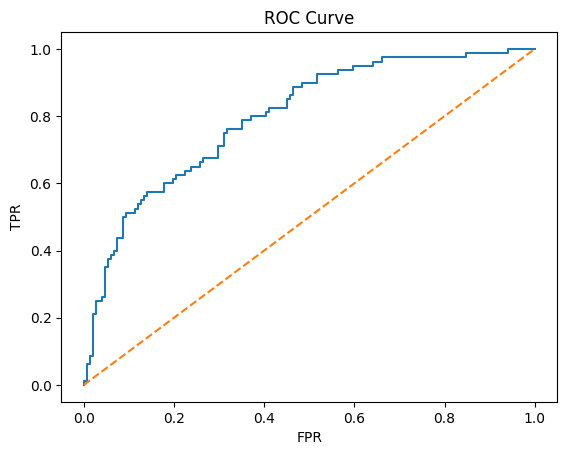

In [7]:
probs = LR.forward(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probs)
print("AUROC score: ", roc_auc_score(y_test,probs))

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], '--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()